In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch



import os
import sys
import glob
import h5py
import numpy as np
import math


import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from tqdm import tqdm
import tensorboard
import tensorboardX
from torch.utils.tensorboard import SummaryWriter


from log import Logger
from data import trainlabelDataset, testlabelDataset
from util import r2, mse, rmse, mae, pp_mse, pp_rmse, pp_mae
from model import  autoencoder_999, autoencoder_333, autoencoder_333_2
from sklearn.decomposition import PCA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def showres(path):
    img_data_tensor=torch.load(path)
    img_data= img_data_tensor[4].numpy()
    img_data.resize(64,64)
    plt.imshow(img_data)
    return img_data

def to_img(x):   # image size 56 * 56 
    x = x.view(x.size(0), 1, 64, 64)
    return x


test_dataset = testlabelDataset()
test_dataloader= DataLoader(dataset=test_dataset, batch_size=300,shuffle=False,drop_last=True)
criterion_none = nn.L1Loss(reduction='none')


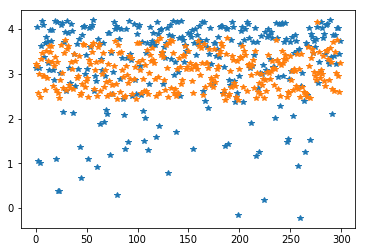

In [39]:
num=10


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333_2().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp479_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()
letent=test_z.data.cpu().numpy()


i=0

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

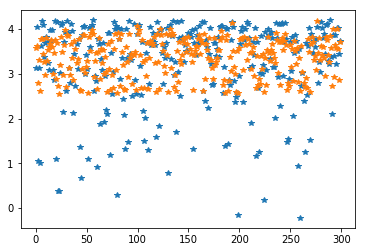

In [28]:
num=7000


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333_2().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp477_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()
letent=test_z.data.cpu().numpy()


i=0

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

In [38]:
letent[0];

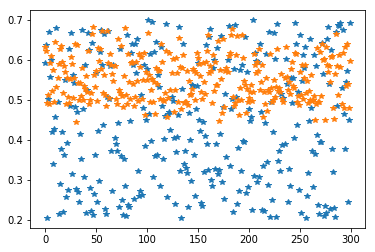

In [29]:

i=5


#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

In [30]:
label_out[0]


array([3.5863488 , 1.6412544 , 1.5402112 , 0.5825297 , 0.60232824,
       0.63122404, 0.59927946], dtype=float32)

In [31]:
letent[0];

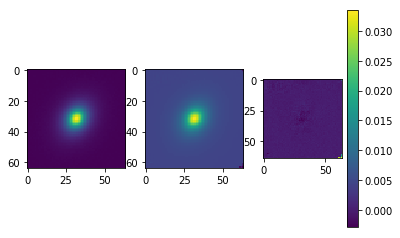

In [32]:
i=90
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

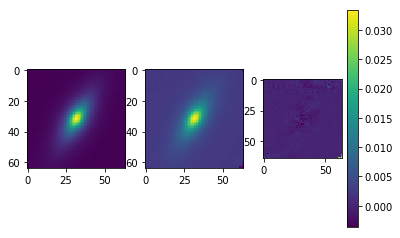

In [33]:
i=120
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

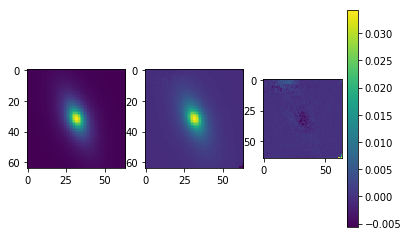

In [34]:
i=160
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

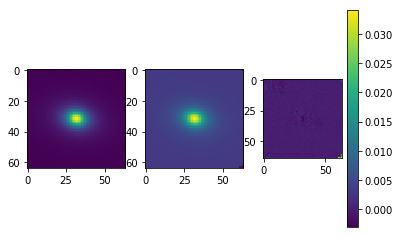

In [36]:
i=28
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

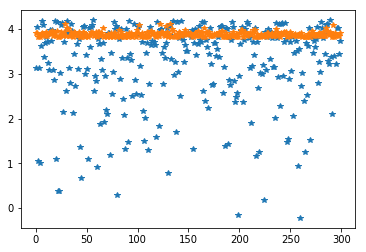

In [59]:
num=50


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333_2().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp478_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()
letent=test_z.data.cpu().numpy()


i=0

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

In [60]:
label_out[0]


array([3.9165454 , 1.2789713 , 1.488563  , 0.4345785 , 0.43264654,
       0.4381663 , 0.45915923], dtype=float32)

In [61]:
letent[:,6].mean()

0.46928054

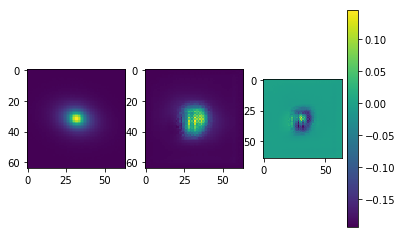

In [62]:
i=100
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

In [2]:
num=4000


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333_2().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp476_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()
letent=test_z.data.cpu().numpy()


i=0

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

In [3]:
letent.shape

(300, 196)

In [6]:
label_out

array([[ 0.00017809, -0.0137652 , -0.02114032, ..., -0.04719352,
        -0.04104065, -0.04053999],
       [ 0.00234558, -0.00672877, -0.01073927, ..., -0.0262292 ,
        -0.02867918, -0.02788323],
       [ 0.01957738,  0.02048659,  0.02086631, ...,  0.01789592,
         0.01957531,  0.01976883],
       ...,
       [ 0.01954   ,  0.01491883,  0.01336628, ..., -0.0256934 ,
        -0.07532965, -0.08073303],
       [ 0.02140216,  0.02022484,  0.02112258, ...,  0.01527595,
         0.01547582,  0.01536958],
       [ 0.0027526 , -0.0050725 , -0.01298544, ..., -0.03554104,
        -0.04151454, -0.0341867 ]], dtype=float32)

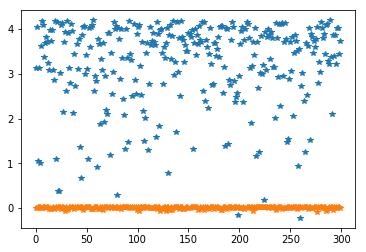

In [7]:
i=0

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

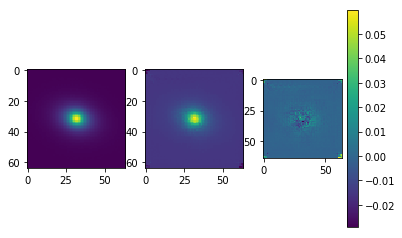

In [37]:
i=100
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

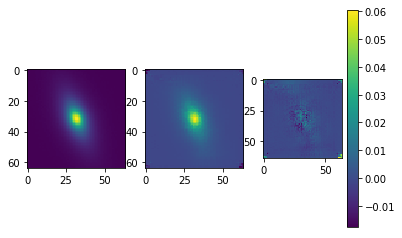

In [38]:
i=160
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

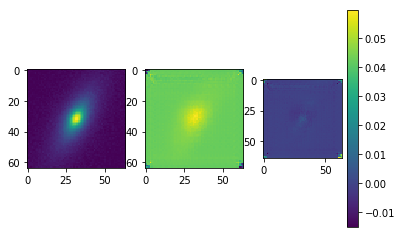

In [41]:
i=240
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

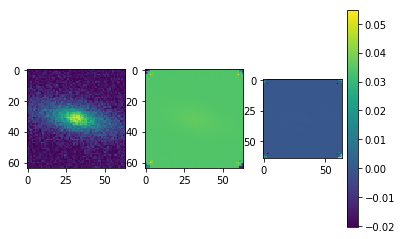

In [8]:
i=20
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

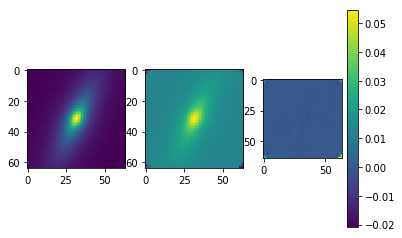

In [9]:
i=40
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

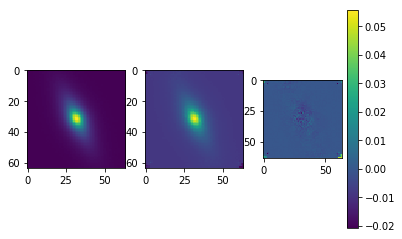

In [10]:
i=81
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

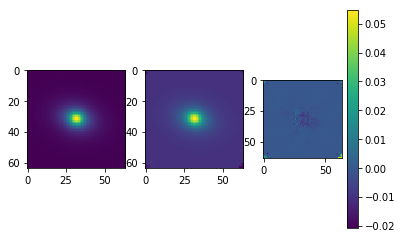

In [11]:
i=100
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

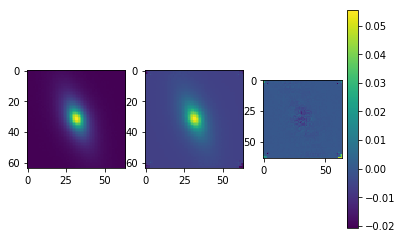

In [12]:
i=160
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

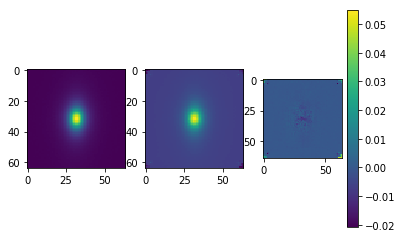

In [13]:
i=270
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

In [14]:
num=7700


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp472_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()

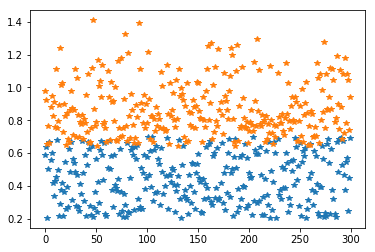

In [15]:
i=5

#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

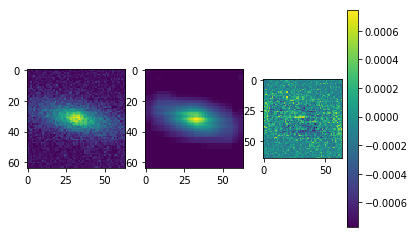

In [16]:
i=20
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

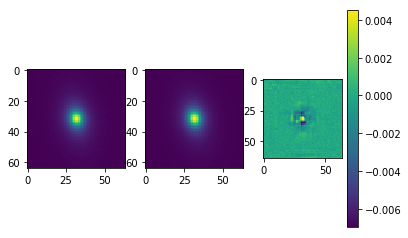

In [17]:
i=10
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

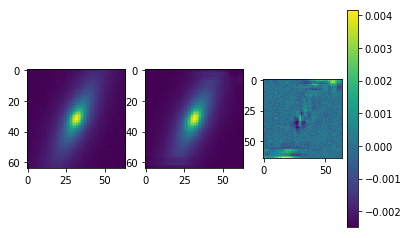

In [18]:
i=40
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

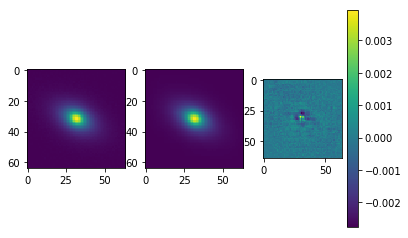

In [19]:
i=200
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

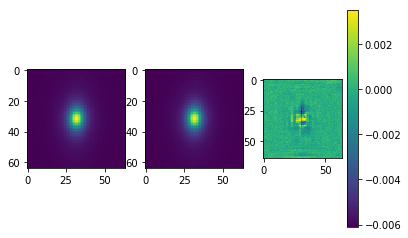

In [20]:
i=270
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

In [21]:
#label_in.shape

In [22]:
#label_out.shape

In [79]:
#label_in[:,5]-label_out[:,5]

In [ ]:
label_in[0][0]

In [ ]:
test_img[0].sum()

In [ ]:
torch.log(test_img[1].sum())

In [ ]:
test_img[0].sum()

In [23]:
num=3990


#batch_size = 64
#learning_rate = 1e-4
#weight=5e4

model = autoencoder_333().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp472_2_{}.pth'.format(num)))    
model.eval()

for data in test_dataloader:
    test_img,test_label= [x.type(torch.float32).cuda() for x in data]
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_output,test_z = model(test_img)
    test_z=test_z.view(test_z.size(0),14*14)
    
 #   test_loss= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean())  + (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
#    test_loss_recon= (( criterion_none(test_output, test_img)/(test_img.sum(dim=3).sum(dim=2).sum(dim=1))).mean()) 
 #   test_loss_latent= (criterion_none(test_z[:,:7], test_label)  /weight).mean() 
        
 #   test_MSE_loss = nn.MSELoss()(test_output, test_img)
  

    



res_in =  test_img.data.cpu().numpy()   
res_out=test_output.data.cpu().numpy()
label_in=test_label.data.cpu().numpy()
label_out=test_z[:,:7].data.cpu().numpy()

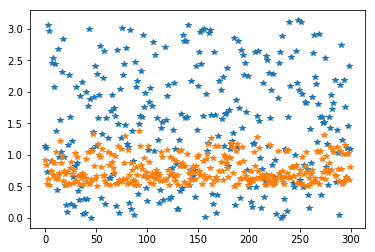

In [24]:
i=6


#x=np.linspace(0,300,1)
plt.plot(label_in[:,i],"*")
plt.plot(label_out[:,i],"*")

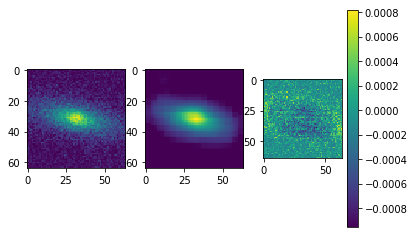

In [25]:
i=20
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

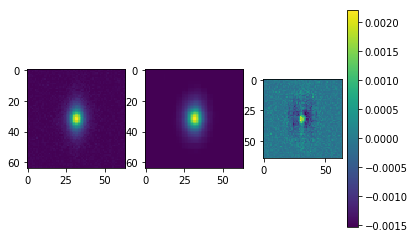

In [26]:
i=60
img_in=res_in[i][0]
img_out=res_out[i][0]

plt.subplot(1, 3, 1)
plt.imshow(img_in)
plt.subplot(1, 3, 2)  
plt.imshow(img_out) 
plt.subplot(1, 3, 3) 
plt.imshow(img_in-img_out) 
plt.colorbar()

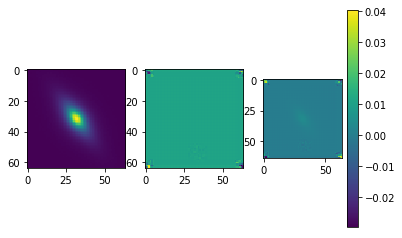

In [27]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp417_test_x_50.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp417_test_x_hat_50.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

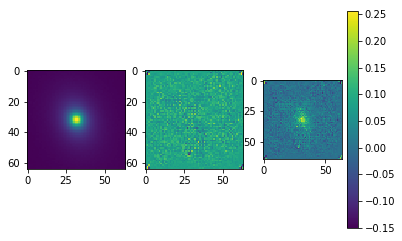

In [28]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp505_test_x_10.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp505_test_x_hat_10.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

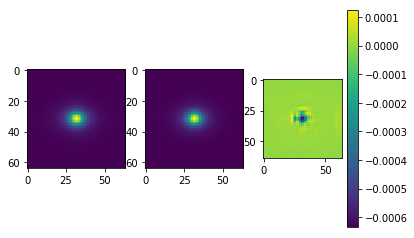

In [29]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp462_test_x_1670.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp462_test_x_hat_1670.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

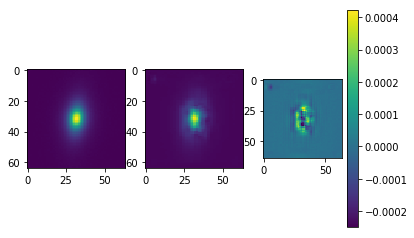

In [30]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp441_test_x_1200.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp441_test_x_hat_1200.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

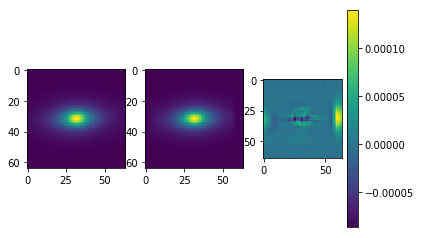

In [31]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp462_test_x_800.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp462_test_x_hat_800.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

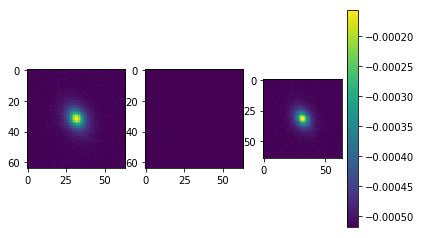

In [32]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp414_test_x_2000.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp414_test_x_hat_2000.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

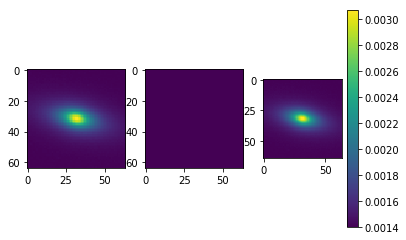

In [33]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp416_test_x_900.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp416_test_x_hat_900.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp413_test_x_4900.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp413_test_x_hat_4900.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp423_test_x_100.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp423_test_x_hat_100.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp601_test_x_8800.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp601_test_x_hat_8800.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp451_test_x_3000.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp451_test_x_hat_3000.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
plt.subplot(1, 3, 1)
a1=showres('gal_img1001/exp651_test_x_6000.pt')
plt.subplot(1, 3, 2)
a2=showres('gal_img1001/exp651_test_x_hat_6000.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [ ]:
num=100
model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp202_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img_ = data
    test_img = test_img_.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_img = test_img.cuda()
    test_img_output, _= model(test_img)

    test_latent = model.encoder(test_img)   #latent 
    
test_img_hat=test_img_output.data.cpu().numpy()



In [ ]:
torch.cuda.empty_cache()

In [ ]:
test_img.shape

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(test_img_hat[0])
plt.subplot(1, 3, 2)
plt.imshow(test_img_[0])
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)

In [ ]:
num=1000
model = autoencoder_333().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img1001/exp205_{}.pth'.format(num)))    
model.eval()


for data in test_dataloader:
    test_img_ = data
    test_img = test_img_.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,64,64)
    test_img = test_img.cuda()
    test_img_output,_= model(test_img)
    test_latent = model.encoder(test_img)   #latent 
    

#x=(test_img.view(test_img.size(0),64,64)).data.cpu().numpy()
#x_hat=(test_img_output.view(test_img.size(0),64,64)).data.cpu().numpy()


In [ ]:
f = h5py.File('test.h5','r')
img = f['img'][:]
gal_flux = f['gal_flux'][:]
bulge_re = f['bulge_re'][:]
disk_n = f['disk_n'][:]
disk_r0 = f['disk_r0'][:]
bulge_frac= f['bulge_frac'][:]
gal_q = f['gal_q'][:]
gal_beta = f['gal_beta'][:]

f.close()


In [ ]:
gal_flux[0]

In [ ]:
b=img[0].max()
for i in range(3000): 
    if img[i].max() > b: 
        b=img[i].max()
    else: 
        b=b
        
    



In [ ]:
b/1e6

In [ ]:
    def __init__(self):
        f = h5py.File('train.h5','r')
        image = f['img'][:]/(1.5e6)    # max-min normalize the image 
        gal_flux = f['gal_flux'][:]/(1.5e6)  
        bulge_re = f['bulge_re'][:]
        disk_n = f['disk_n'][:]
        disk_r0 = f['disk_r0'][:]
        bulge_frac= f['bulge_frac'][:]
        gal_q = f['gal_q'][:]
        gal_beta = f['gal_beta'][:]
        f.close()
        
        image.astype('float32')
        gal_flux.astype('float32')
        bulge_re.astype('float32')
        disk_n.astype('float32')
        disk_r0.astype('float32')
        bulge_frac.astype('float32')
        gal_q.astype('float32')
        gal_beta.astype('float32')
        
        self.len = image.shape[0]
        self.image= torch.from_numpy(image[:])
        self.gal_flux = torch.log(torch.from_numpy(gal_flux[:]))
        self.bulge_re = torch.from_numpy(bulge_re[:])
        self.disk_n = torch.from_numpy(disk_n[:])
        self.disk_r0 = torch.from_numpy(disk_r0[:])
        self.bulge_frac = torch.from_numpy(bulge_frac[:])
        self.gal_q = torch.from_numpy(gal_q[:])
        self.gal_beta = torch.from_numpy(gal_beta[:])
        